# Task 3
统计分析电影的打分分布状况、右侧有用的分布、点评量随时间的变化、点评人常居地的分布等，并用可视化的方式展示

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# rc: resource configuration
mpl.rc('figure', figsize=(16, 7))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
raw_data = pd.read_csv('./data/cmt_data1.csv', lineterminator='\n', parse_dates=['time'])

In [4]:
raw_data.head()

,user,star,comment,time
0,kingfish,5,不需要女主角的好电影,2006-03-22
1,犀牛,5,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28
2,711|湯好运,5,策划了19年的私奔……,2010-03-27
3,Eve|Classified,5,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09
4,艾小柯,5,关于希望最强有力的注释。,2006-06-20


In [5]:
raw_data.dtypes

user               object
star               object
comment            object
time       datetime64[ns]
dtype: object

## 将star转为数字

In [6]:
raw_data['star'].value_counts()

5    9735
4    4915
3    1609
-     409
2     291
1     141
Name: star, dtype: int64

In [7]:
raw_data[raw_data['star'] == '-']

,user,star,comment,time
80,熊仔俠,-,原來那個鏡頭是來自這部電影的。總算把imdb最高分的電影看了。但是我的評分就不方便給了。,2010-08-29
159,someoneLikeYou,-,never thought out Shawshank can run out of the...,2012-06-18
225,Little Punk,-,风华绝代,2006-12-01
236,15,-,请再给我一个昏暗场地和一个下午,2007-05-27
240,小慢,-,风华绝代,2006-07-17
303,葵葵,-,那个西塘的夜晚你陪我通宵看电影,2014-11-06
308,匹诺曹,-,非常经典……,2007-01-15
369,junepig,-,男人阳污，女人淫秽,2007-06-21
429,王xx,-,我妈说：这个小孩儿怎么办啊，她又不想学习！她又学不进去！,2007-12-16
432,王小邪,-,复杂的社会关系里总有绽放如花的感情,2008-02-02


In [8]:
raw_data.loc[raw_data['star'] == '-','star'] = np.nan

In [9]:
raw_data['star'].value_counts()

5    9735
4    4915
3    1609
2     291
1     141
Name: star, dtype: int64

In [10]:
raw_data['star'] = raw_data['star'].astype(float)

In [11]:
raw_data.dtypes

user               object
star              float64
comment            object
time       datetime64[ns]
dtype: object

## 增加一些features

In [12]:
raw_data['name_length'] = raw_data['user'].map(lambda x: len(str(x)))

In [13]:
raw_data.head()

,user,star,comment,time,name_length
0,kingfish,5.0,不需要女主角的好电影,2006-03-22,8
1,犀牛,5.0,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28,2
2,711|湯好运,5.0,策划了19年的私奔……,2010-03-27,7
3,Eve|Classified,5.0,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09,14
4,艾小柯,5.0,关于希望最强有力的注释。,2006-06-20,3


In [14]:
raw_data['cmt_length'] = raw_data['comment'].map(lambda x: len(str(x)))

In [15]:
raw_data.head()

,user,star,comment,time,name_length,cmt_length
0,kingfish,5.0,不需要女主角的好电影,2006-03-22,8,10
1,犀牛,5.0,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28,2,160
2,711|湯好运,5.0,策划了19年的私奔……,2010-03-27,7,11
3,Eve|Classified,5.0,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09,14,218
4,艾小柯,5.0,关于希望最强有力的注释。,2006-06-20,3,12


In [16]:
raw_data['year'] = raw_data['time'].map(lambda x: x.year)
raw_data['month'] = raw_data['time'].map(lambda x: x.month)
raw_data['day'] = raw_data['time'].map(lambda x: x.day)
raw_data['weekday'] = raw_data['time'].map(lambda x: x.isoweekday()) # Monday is 1 and Sunday is 7
raw_data['weeknumber'] = raw_data['time'].map(lambda x: x.isocalendar()[1])

In [17]:
raw_data.head()

,user,star,comment,time,name_length,cmt_length,year,month,day,weekday,weeknumber
0,kingfish,5.0,不需要女主角的好电影,2006-03-22,8,10,2006,3,22,3,12
1,犀牛,5.0,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28,2,160,2005,10,28,5,43
2,711|湯好运,5.0,策划了19年的私奔……,2010-03-27,7,11,2010,3,27,6,12
3,Eve|Classified,5.0,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09,14,218,2008,5,9,5,19
4,艾小柯,5.0,关于希望最强有力的注释。,2006-06-20,3,12,2006,6,20,2,25


In [18]:
import string
searchlist = [*list(string.ascii_lowercase), *list(string.ascii_uppercase)]
def searchAlpha(word):
    cat = 0
    for letter in word:
        if letter in searchlist:
            cat = 1
    return cat

In [19]:
raw_data['name_w_alpha'] = raw_data['user'].map(lambda x: searchAlpha(str(x)))
raw_data['cmt_w_alpha'] = raw_data['comment'].map(lambda x: searchAlpha(str(x)))

In [20]:
raw_data.head()

,user,star,comment,time,name_length,cmt_length,year,month,day,weekday,weeknumber,name_w_alpha,cmt_w_alpha
0,kingfish,5.0,不需要女主角的好电影,2006-03-22,8,10,2006,3,22,3,12,1,0
1,犀牛,5.0,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28,2,160,2005,10,28,5,43,0,0
2,711|湯好运,5.0,策划了19年的私奔……,2010-03-27,7,11,2010,3,27,6,12,0,0
3,Eve|Classified,5.0,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09,14,218,2008,5,9,5,19,1,0
4,艾小柯,5.0,关于希望最强有力的注释。,2006-06-20,3,12,2006,6,20,2,25,0,0


In [21]:
def searchDigit(word):
    cat = 0
    for letter in word:
        if letter.isdigit():
            cat = 1
    return cat

In [22]:
raw_data['name_w_digit'] = raw_data['user'].map(lambda x: searchDigit(str(x)))
raw_data['cmt_w_digit'] = raw_data['comment'].map(lambda x: searchDigit(str(x)))

In [23]:
raw_data.head()

,user,star,comment,time,name_length,cmt_length,year,month,day,weekday,weeknumber,name_w_alpha,cmt_w_alpha,name_w_digit,cmt_w_digit
0,kingfish,5.0,不需要女主角的好电影,2006-03-22,8,10,2006,3,22,3,12,1,0,0,0
1,犀牛,5.0,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...,2005-10-28,2,160,2005,10,28,5,43,0,0,0,0
2,711|湯好运,5.0,策划了19年的私奔……,2010-03-27,7,11,2010,3,27,6,12,0,0,1,1
3,Eve|Classified,5.0,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...,2008-05-09,14,218,2008,5,9,5,19,1,0,0,0
4,艾小柯,5.0,关于希望最强有力的注释。,2006-06-20,3,12,2006,6,20,2,25,0,0,0,0


In [96]:
raw_data.to_csv('.data/cmt_data2.csv', index=False)

# 打分 vs 时间

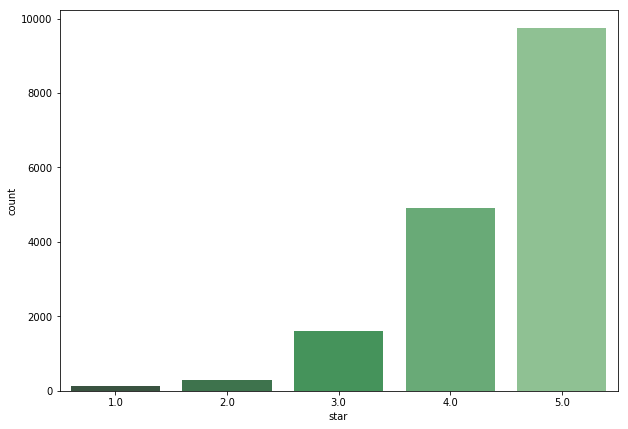

In [25]:
# 打分总和分布
sns.countplot(x="star", data=raw_data, palette="Greens_d")

### 观察结果：5星和4星 >> 其他

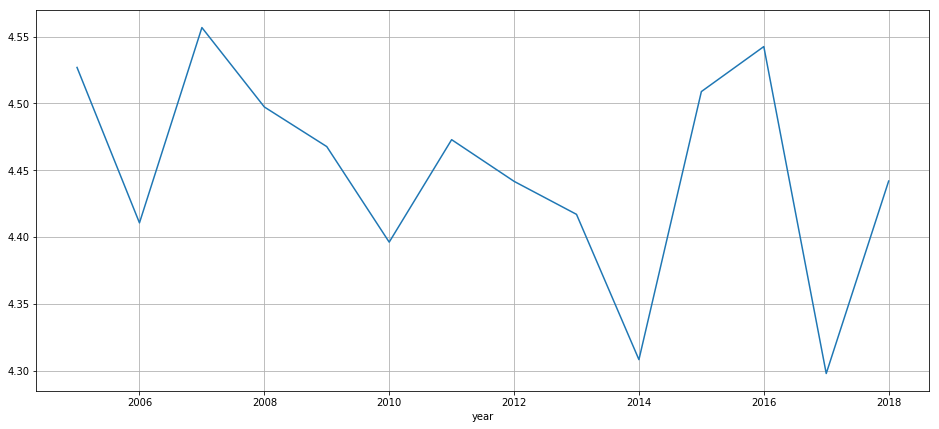

In [31]:
# 每年打分均值
var = raw_data.groupby('year').star.mean()
var.plot(kind='line', grid=True)

### 观察结果：整体有下降趋势，尽管2016年有上升

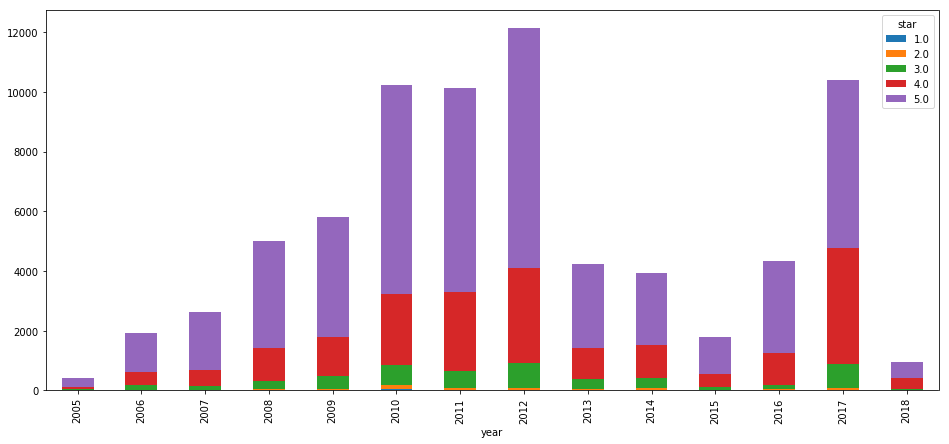

In [41]:
# 每年各星级加和
var = raw_data.groupby(['year', 'star']).star.sum()
var.unstack().plot(kind='bar', stacked=True)

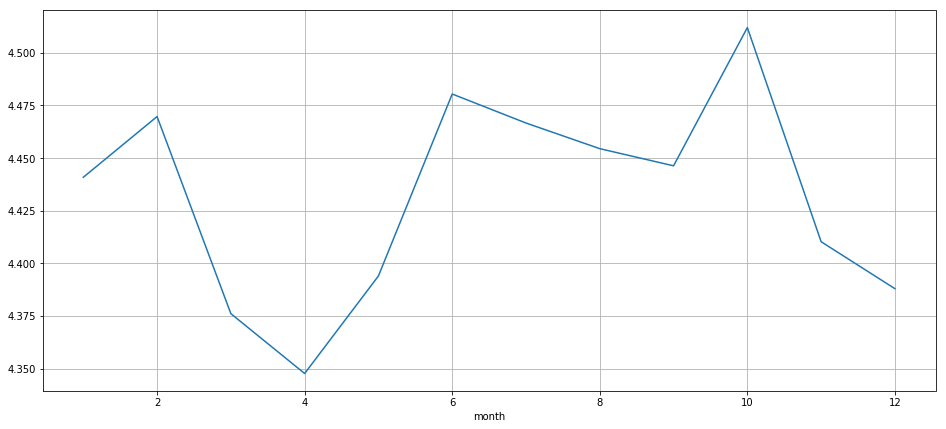

In [47]:
# 每月均值
var = raw_data.groupby('month').star.mean()
var.plot(kind='line', grid=True)

### 观察结果：4月评级最低，10月最高

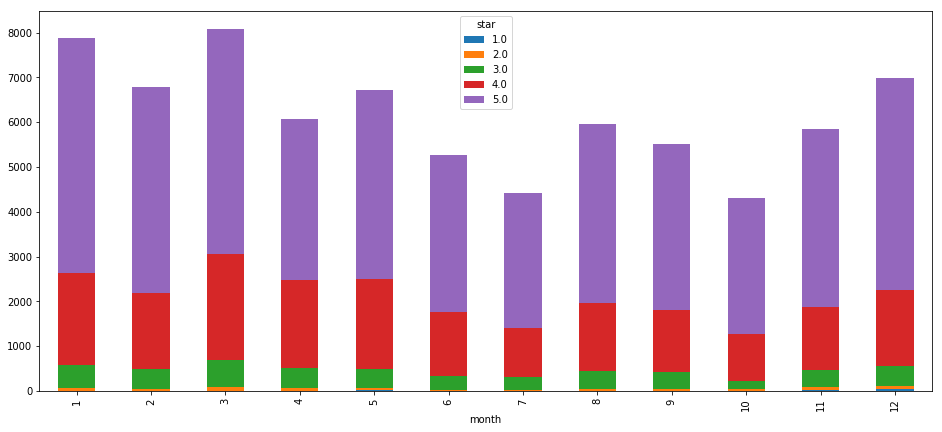

In [42]:
#每月各星级加和
var = raw_data.groupby(['month', 'star']).star.sum()
var.unstack().plot(kind='bar', stacked=True)

https://zhuanlan.zhihu.com/p/27683042

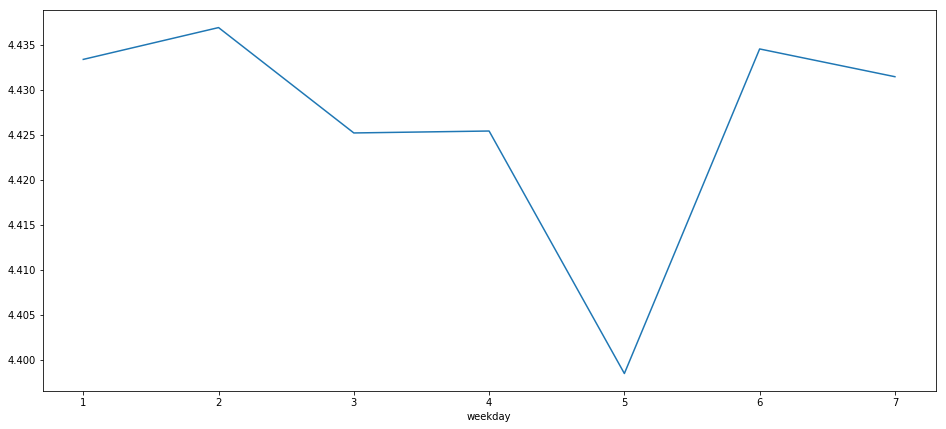

In [48]:
# weekday星级均值
var = raw_data.groupby('weekday').star.mean()
var.plot(kind='line')

### 观察结果：周五评级最低

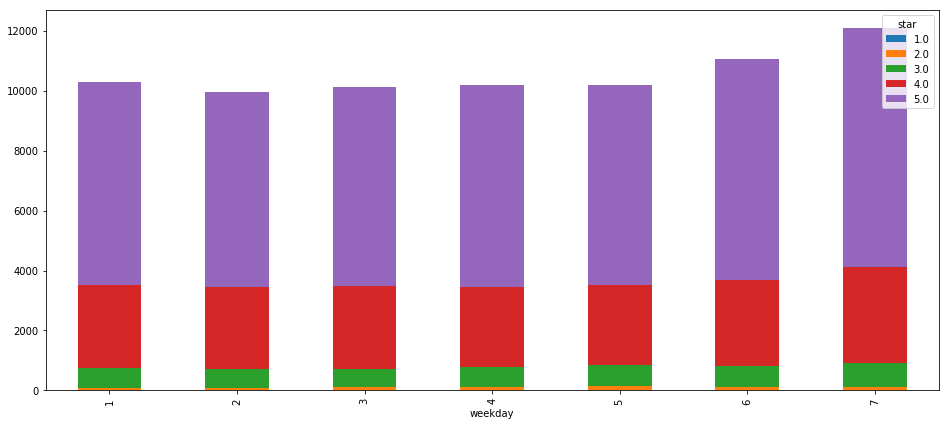

In [50]:
var = raw_data.groupby(['weekday', 'star']).star.sum()
var.unstack().plot(kind='bar', stacked=True)

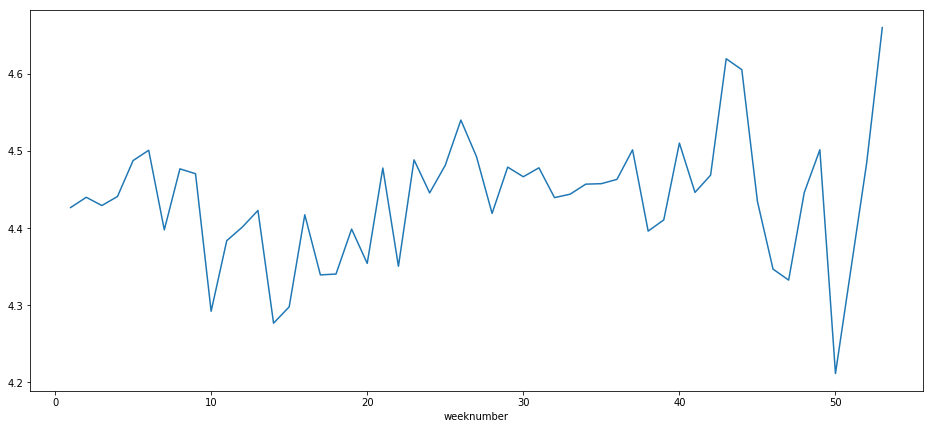

In [19]:
# 每年周数评分均值
var = raw_data.groupby('weeknumber').star.mean()
var.plot(kind='line')

### 观察结果：第50周评价最低，大致是12月中下旬

# 用户名与打分

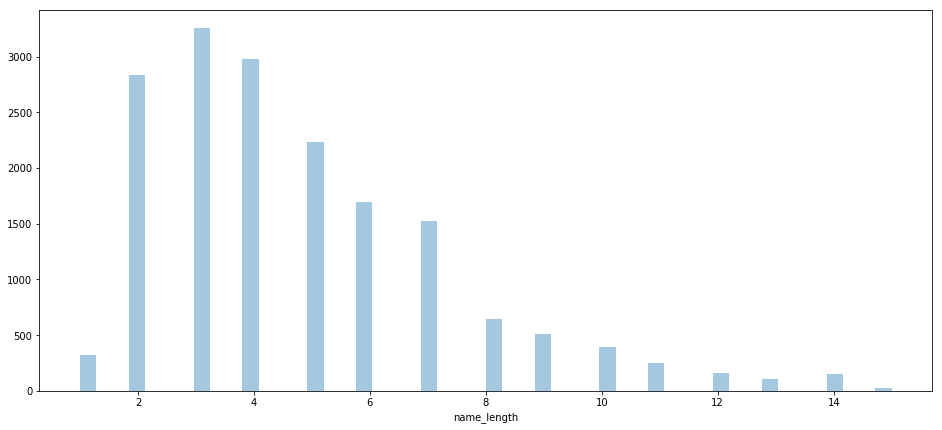

In [54]:
# 用户名长度分布
var = raw_data['name_length']
sns.distplot(var, kde=False)

### 观察结果：用户名长度positive skew

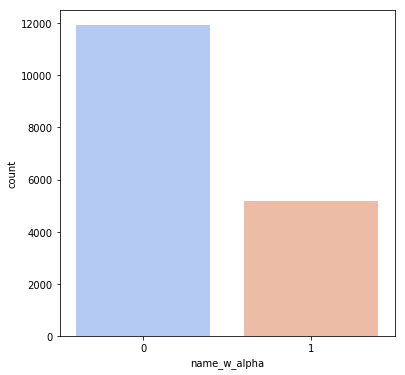

In [61]:
# 用户名是否包含英文字母分布
plt.figure(figsize=(6,6))
sns.countplot(x='name_w_alpha', data=raw_data, palette='coolwarm')

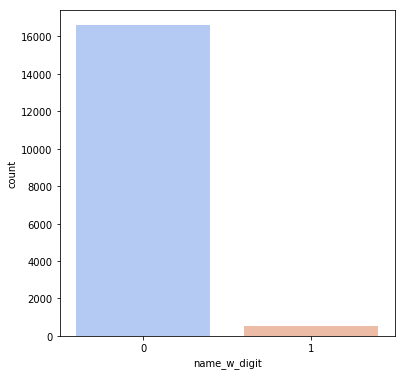

In [63]:
# 用户名是否包含数字
plt.figure(figsize=(6,6))
sns.countplot(x='name_w_digit', data=raw_data, palette='coolwarm')

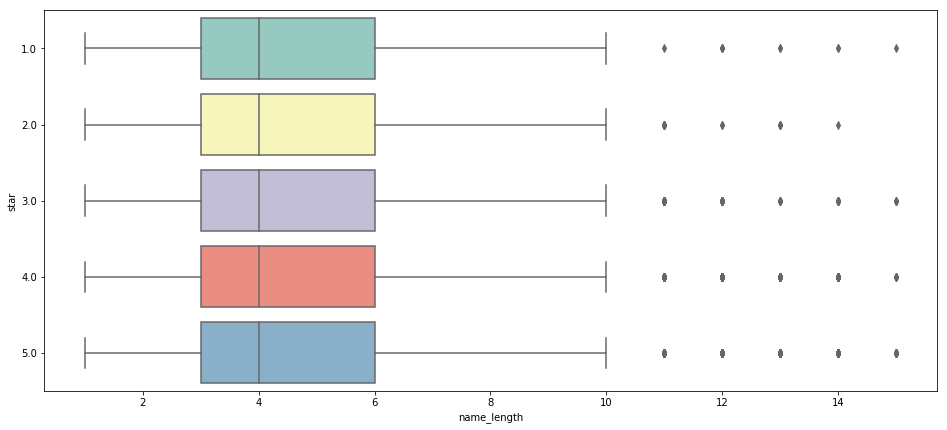

In [67]:
# 用户名长度 vs 打分
sns.boxplot(y = 'star', x = 'name_length', data = raw_data, palette='Set3', orient = 'h')

### 观察结果：用户名长度与打分基本无关

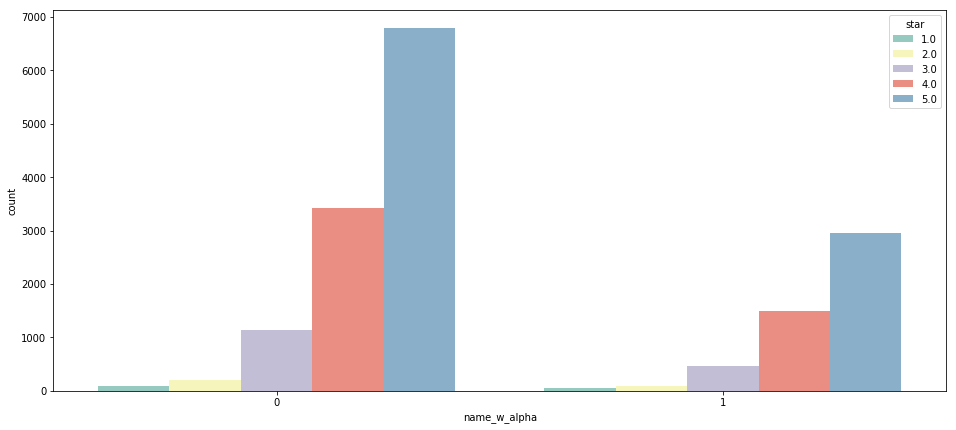

In [70]:
# 是否包含英文字母
sns.countplot(x = 'name_w_alpha', hue= 'star', data = raw_data, palette='Set3')

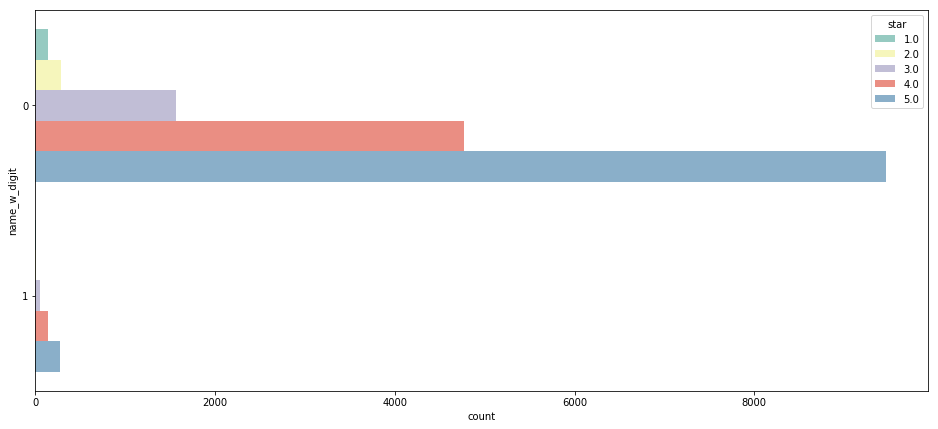

In [74]:
# 是否包含数字
sns.countplot(y = 'name_w_digit', hue= 'star', data = raw_data, palette='Set3', orient = 'h')

# 评论 vs 打分

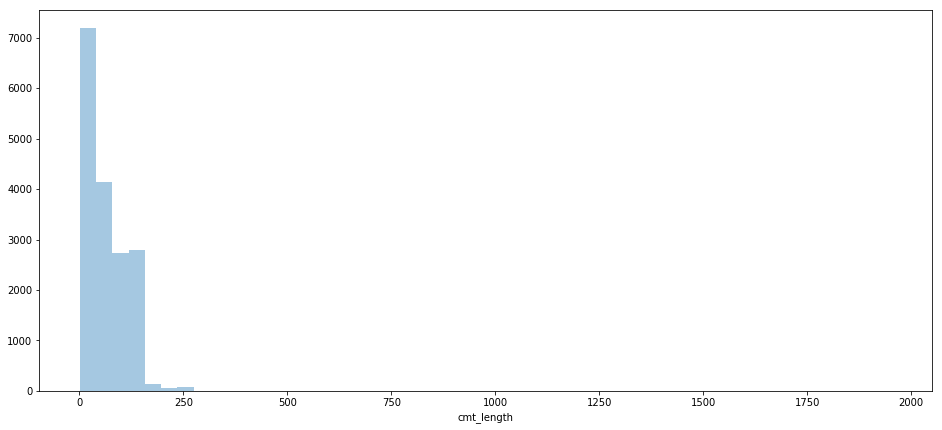

In [75]:
# 评论长度分布
var = raw_data['cmt_length']
sns.distplot(var, kde=False)

In [77]:
raw_data.describe()['cmt_length']

count    17100.000000
mean        63.440936
std         49.936779
min          1.000000
25%         23.000000
50%         51.000000
75%        100.000000
max       1953.000000
Name: cmt_length, dtype: float64

In [80]:
# 奇怪的最大值，原以为短评限字数
# 查看原始数据是否有误
list(raw_data.loc[raw_data['cmt_length']==1953, 'comment'])

['看到了人性的丑恶   更是看到了人性的光辉\r\n\r\n一个性启蒙时期的少年雷纳多   爱上了成熟美艳的少妇玛莲娜\r\n\r\n那些为了能见到她 为了能碰到她  \r\n而骑着自行车狂奔的时刻   像是在追逐自己的幸福\r\n\r\n那些因为看到别人诋毁   自己喜欢的女人   而去报复  的小动作\r\n\r\n那个在教堂里   虔诚的跪在圣象面前\r\n喃喃自语的说  在我未有能力照顾好她之前    请神一定要好好保护她   的少年\r\n\r\n那个亲眼目睹她因为生活所迫  而被迫 出卖肉体   去换取卑微的生活用品时\r\n看到她被那些世俗的男子拥抱在怀里   那种悲愤交加的心情 的少年\r\n个中掺杂的辛酸和怨恨 还有嫉妒  又有谁可以明白呢     这是一个少年最初的爱啊\r\n\r\n会记得那个女人被小镇人唾弃 侮辱  的时候   少年的眼泪哗啦啦的流着    就像那些难以言明的痛楚一样\r\n还有在月台上  少年看着自己一直爱的女人落魄的离开小镇时  那双洋溢着不舍和爱的眼睛里  目睹着火车的渐行渐远像是在把少年的思念延续到远方一样    我想  尽管火车带走了她    但少年那份爱    是任何时间和距离都无法跨越的    这个少年就是爱的如此执着   爱的如此刻骨铭心\r\n\r\n感谢导演托纳托雷   在最后把尊严还给了玛莲娜  这个曾被世俗所堙灭的美丽女人  在洗尽铅华过后  重返小镇  在广场上  在众人的诧异和谈论中   丈夫挽着她的手  她依靠在丈夫的怀里  目无表情的穿越过人群  那些曾垂涎并且无耻的占有过她肉体的男人们  看到她的那份淡定和从容不知他们会不会有所反思  想起片中的一句话  只有重返旧地   才能重拾尊严   这也许是对玛莲娜最好的褒奖    \r\n\r\n不得不提的是玛莲娜那位被误以为战死于沙场的断臂丈夫   在经历了一场因狂热的民族主义而爆发的战争后  带着已有残缺的身体和疲惫不堪的心 回到他的故乡或许生命于他而言  唯一还有一点希望的是  他一直以为他的妻子还有他们的家  一直在等待着他的归来   只是当他回到那个小镇  回到他曾经的家   却再也找不到他的妻子爱人  没有人告诉他玛莲娜在他离开之后所遭受的种种不平   没有人告诉他玛莲娜的下落  只有小镇的人对他的无尽的讥讽和嘲笑    他甚至必须和难

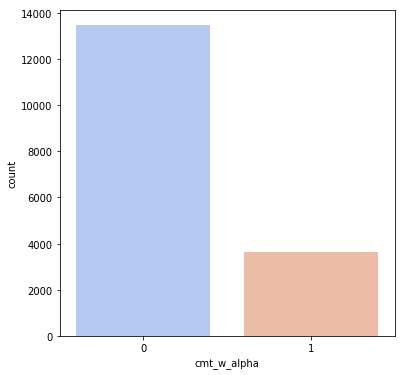

In [81]:
# 评论是否包括英文
plt.figure(figsize=(6,6))
sns.countplot(x='cmt_w_alpha', data=raw_data, palette='coolwarm')

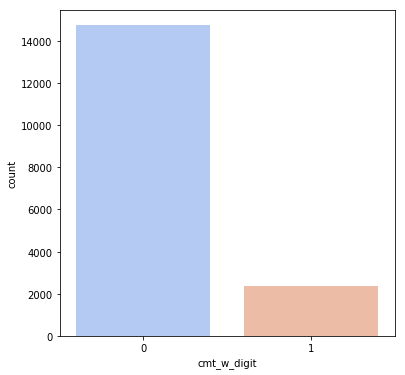

In [82]:
# 评论是否包括数字
plt.figure(figsize=(6,6))
sns.countplot(x='cmt_w_digit', data=raw_data, palette='coolwarm')

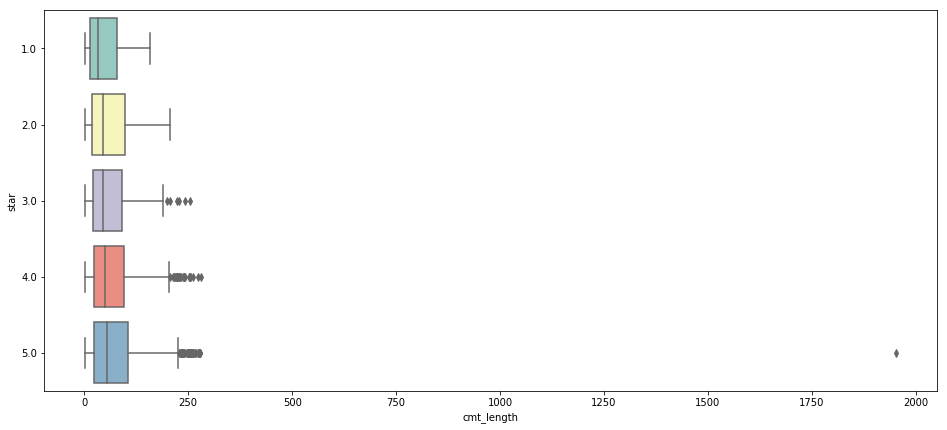

In [83]:
# 评价长度 vs 打分
sns.boxplot(y = 'star', x = 'cmt_length', data = raw_data, palette='Set3', orient = 'h')

### 观察结果：评级为1星的字数少于其他

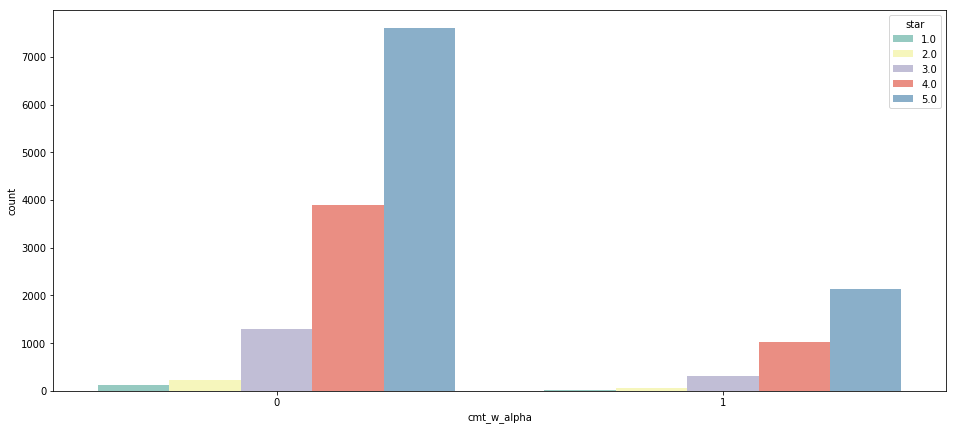

In [84]:
# 评论是否包含英文字母 vs 星级
sns.countplot(x = 'cmt_w_alpha', hue= 'star', data = raw_data, palette='Set3')

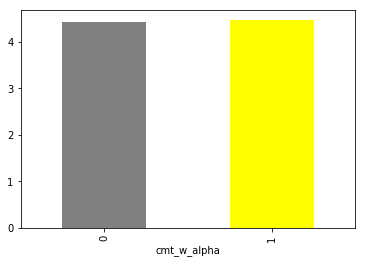

In [29]:
plt.figure(figsize=(6,4))
var = raw_data.groupby('cmt_w_alpha').star.mean()
var.plot(kind='bar', color=['grey','yellow'])

### 观察结果：评论中有英文的评级略高

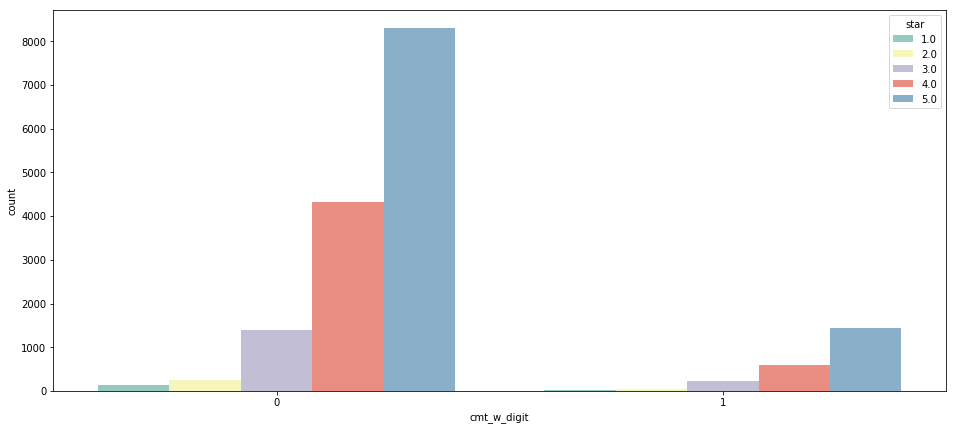

In [85]:
# 是否包含数字 vs 星级
sns.countplot(x = 'cmt_w_digit', hue= 'star', data = raw_data, palette='Set3')

In [32]:
raw_data.columns

Index(['user', 'star', 'comment', 'time', 'name_length', 'cmt_length', 'year',
       'month', 'day', 'weekday', 'weeknumber', 'name_w_alpha', 'cmt_w_alpha',
       'name_w_digit', 'cmt_w_digit\r'],
      dtype='object')

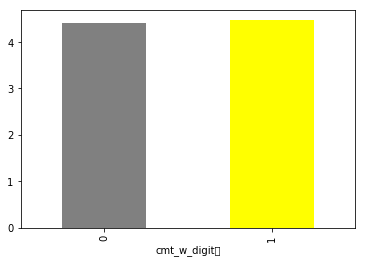

In [33]:
plt.figure(figsize=(6,4))
var = raw_data.groupby('cmt_w_digit\r').star.mean()
var.plot(kind='bar', color=['grey','yellow'])

### 观察结果：评论中有数字的评级略高

# 用户名 vs 评论长度

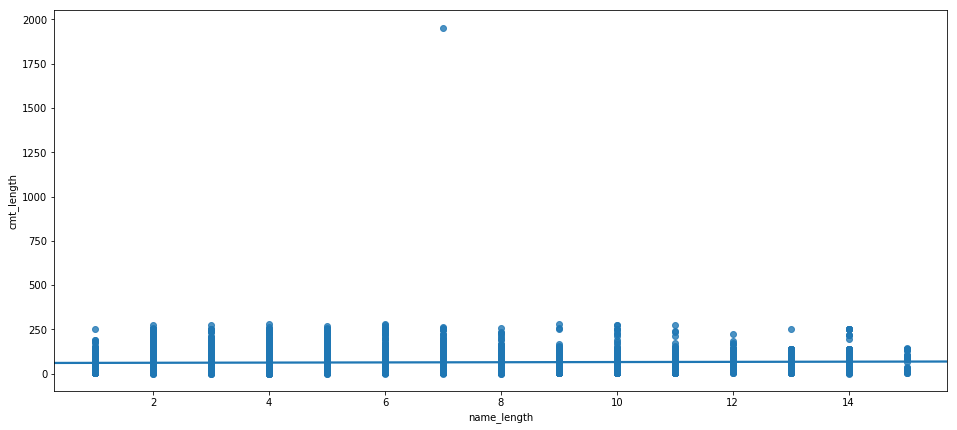

In [92]:
sns.regplot(x="name_length", y="cmt_length", data=raw_data)

- 去掉异常值

In [94]:
dropMax = raw_data.drop(raw_data[raw_data['cmt_length']==1953].index)

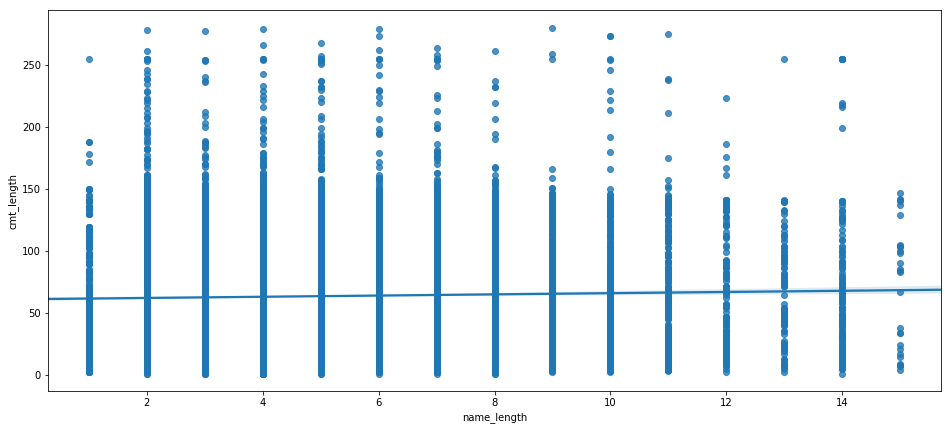

In [95]:
sns.regplot(x="name_length", y="cmt_length", data=dropMax)

### 用户名长度与评论长度没有太大关系（可能是与短评限字有关？）

# 评论数量分布

- 每年评论数量

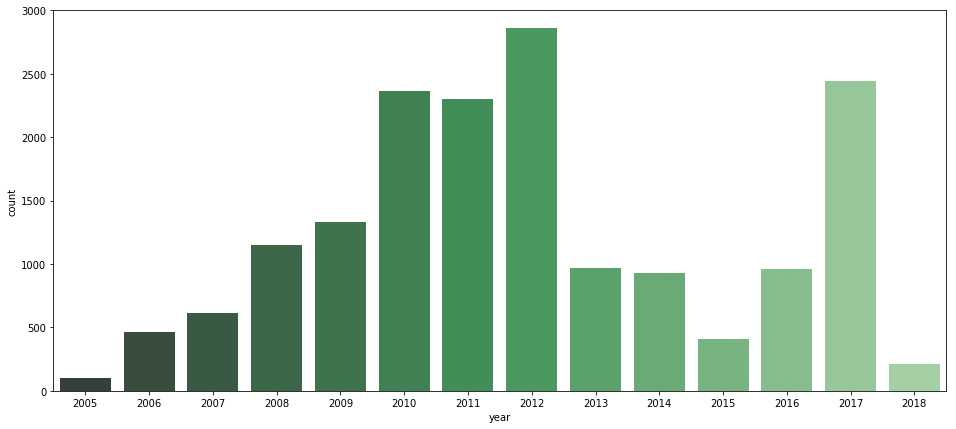

In [20]:
sns.countplot(x = 'year', data = raw_data, palette="Greens_d")

- 每月评论数量

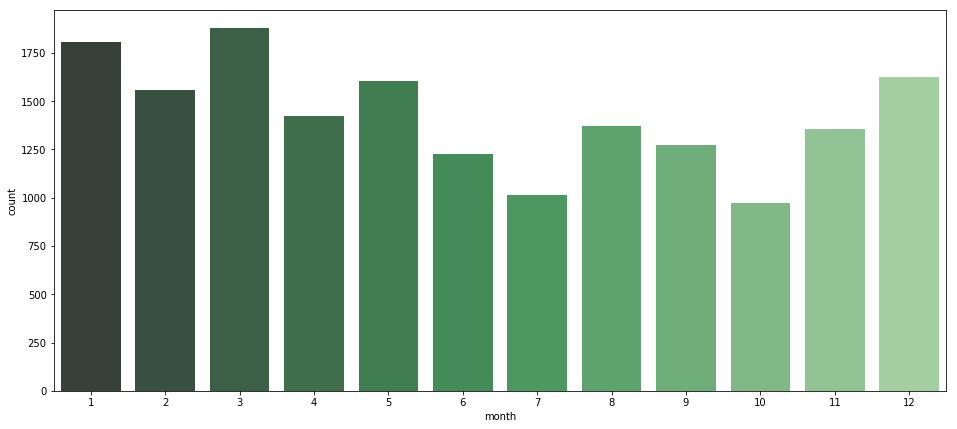

In [21]:
sns.countplot(x = 'month', data = raw_data, palette="Greens_d")

- weekday评论数量

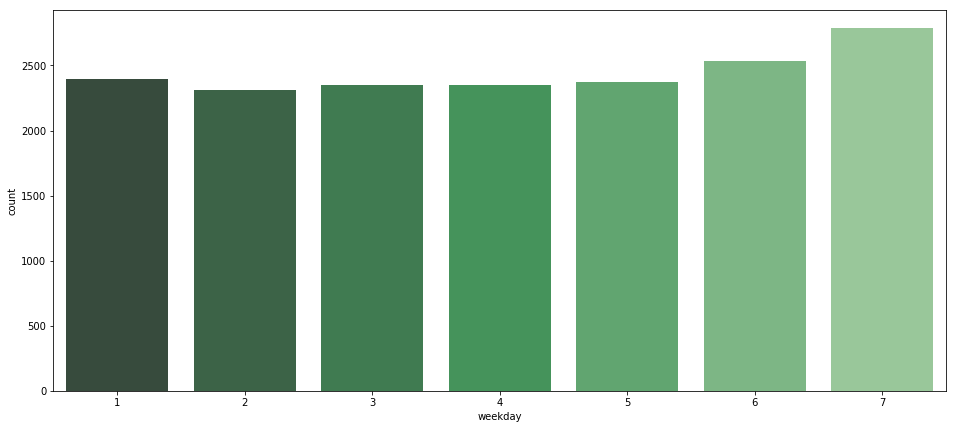

In [22]:
sns.countplot(x = 'weekday', data = raw_data, palette="Greens_d")

### 观察结果：周日评论量多

# 评论长度分布

- 每年评论长度均值

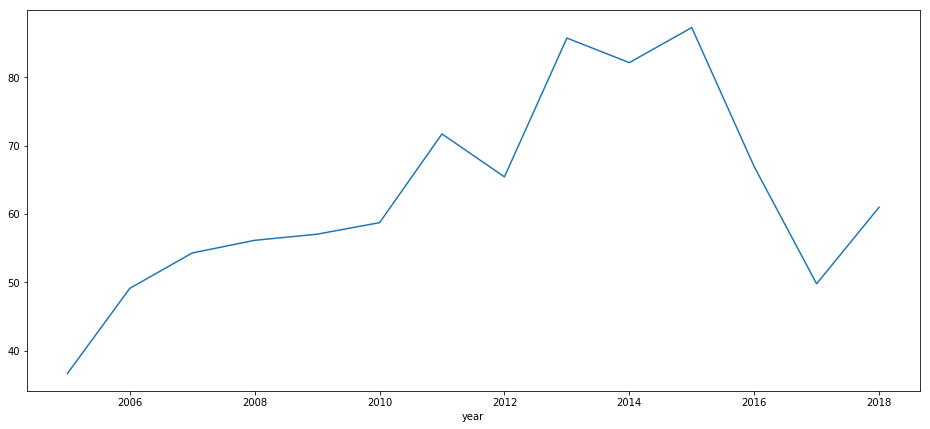

In [23]:
var = raw_data.groupby('year').cmt_length.mean()
var.plot(kind='line')

### 观察结果：在2016年以前，评论越来越长，但是2017年骤降

- 月份评论长度均值

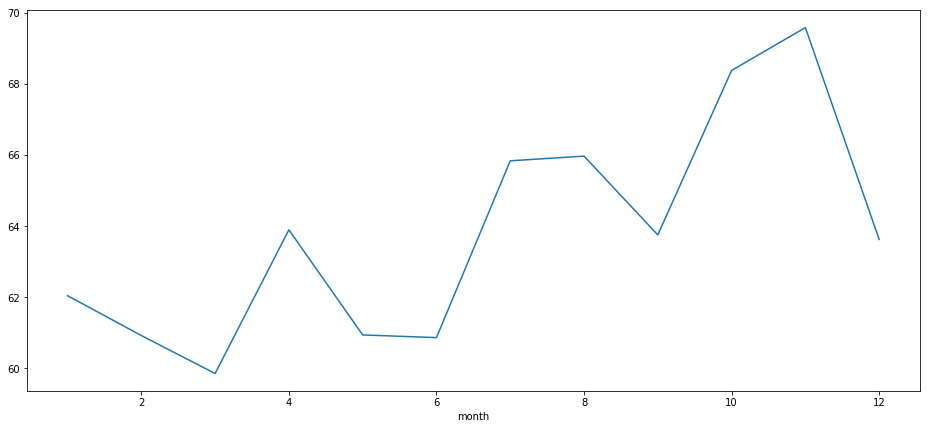

In [24]:
var = raw_data.groupby('month').cmt_length.mean()
var.plot(kind='line')

### 观察结果：10、11月份话多

- weekday评论长度均值

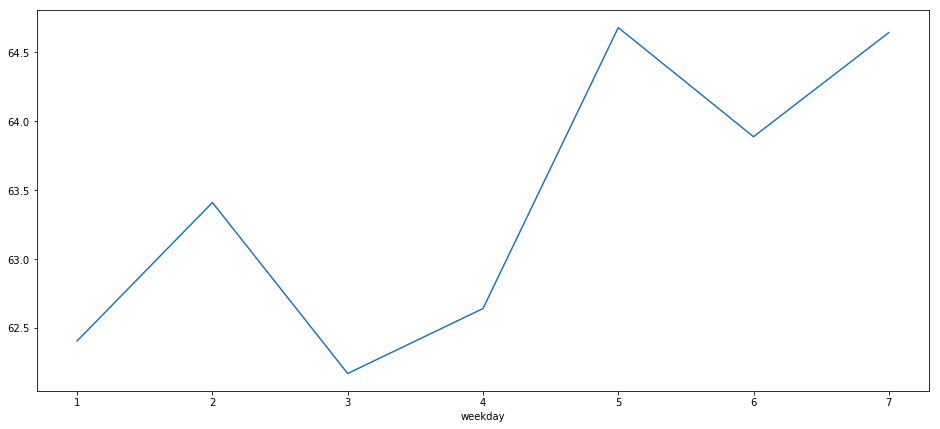

In [25]:
var = raw_data.groupby('weekday').cmt_length.mean()
var.plot(kind='line')

### 观察结果：周五和周日话多

- 